# Homework: Sonar signal classification
In this workshop you will train a binary classification neural network to differentiate if sonar signals bounced against a metal cylinder or a rock.

[Info of the data](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks))

Goal: Get an accuracy higher than 0.80 in the validation set

## Get the data from Google Drive

In [1]:
# Import libraries to interact with Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
# Authenticate with your Google account to get access to the data
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# Download data
download = drive.CreateFile({'id': '1rw5l3jCo2vlNc8NLrMk3KPZr6HsjNRCY'})
download.GetContentFile('sonar.csv')

In [4]:
ls

sample_data/  sonar.csv


## Do some magic below! ;)

In [5]:
import pandas as pd
import numpy as np

sonar_data = pd.read_csv("sonar.csv")

In [6]:
sonar_data.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [7]:
sonar_data.columns

Index(['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539',
       '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645',
       '0.0660', '0.2273', '0.3100', '0.2999', '0.5078', '0.4797', '0.5783',
       '0.5071', '0.4328', '0.5550', '0.6711', '0.6415', '0.7104', '0.8080',
       '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537',
       '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383',
       '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167',
       '0.0180', '0.0084', '0.0090', '0.0032', 'R'],
      dtype='object')

In [8]:
# Import dependencies for pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [9]:
sonar_data_numpy = sonar_data.values

In [10]:
print(type(sonar_data))
print(type(sonar_data_numpy))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [11]:
x = sonar_data_numpy[:, :60]
y = sonar_data_numpy[:, 60:61]

In [12]:
print("Shape of training data: ", x.shape)
print("Shape of training labels: ", y.shape)

Shape of training data:  (207, 60)
Shape of training labels:  (207, 1)


In [13]:
np.unique(y)

array(['M', 'R'], dtype=object)

In [14]:
sc = StandardScaler()
sc.fit(x)
x_norm = sc.transform(x)

In [15]:
print("Before normalization: \n", x[1, :])
print("After normalization: \n", x_norm[1, :])

Before normalization: 
 [0.0262 0.0582 0.1099 0.1083 0.0974 0.228 0.2431 0.3771 0.5598 0.6194
 0.6333 0.706 0.5544 0.532 0.6479 0.6931 0.6759 0.7551 0.8929 0.8619
 0.7974 0.6737 0.4293 0.3648 0.5331 0.2413 0.507 0.8533 0.6036 0.8514
 0.8512 0.5045 0.1862 0.2709 0.4232 0.3043 0.6116 0.6756 0.5375 0.4719
 0.4647 0.2587 0.2129 0.2222 0.2111 0.0176 0.1348 0.0744 0.013 0.0106
 0.0033 0.0232 0.0166 0.0095 0.018 0.0244 0.0316 0.0164 0.0095 0.0078]
After normalization: 
 [-0.13089402  0.59942737  1.71912994  1.16735119  0.40146635  2.0878624
  1.96783928  2.84755057  3.24033559  3.0588314   2.99336374  3.25412687
  1.99301568  1.43153632  1.59516994  1.35054941  0.98418341  1.15587309
  1.50434322  1.13657152  0.7299634   0.19103966 -0.87578456 -1.29060301
 -0.58117267 -1.9344945  -0.79426005  0.67421422 -0.15940651  1.22329719
  1.62389684  0.30345092 -1.11702254 -0.56812432  0.12778034 -0.29870811
  1.04310888  1.58973492  1.06937304  0.8985258   1.02344674 -0.11597725
 -0.2408284   0.069046

In [16]:
y

array([['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
       ['R'],
      

In [17]:
onehot_enc = OneHotEncoder()
y_onehot = onehot_enc.fit_transform(y).toarray()

In [18]:
# Show labels before and after one-hot encoding
print("Before onet-hot encodeing: \n", y[0])
print("After onet-hot encodeing: \n", y_onehot[0])

Before onet-hot encodeing: 
 ['R']
After onet-hot encodeing: 
 [0. 1.]


In [19]:
X_train, X_val, y_train, y_val = train_test_split(x_norm, y_onehot,
                                                  test_size=0.1)

In [20]:
print("Size of training data: ", X_train.shape)
print("Size of training labels: ", y_train.shape)
print("Size of validation data: ", X_val.shape)
print("Size of validation labels: ", y_val.shape)

Size of training data:  (186, 60)
Size of training labels:  (186, 2)
Size of validation data:  (21, 60)
Size of validation labels:  (21, 2)


In [21]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [29]:
model = Sequential()
model.add(Dense(16, input_dim=60, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                976       
                                                                 
 dense_7 (Dense)             (None, 12)                204       
                                                                 
 dense_8 (Dense)             (None, 2)                 26        
                                                                 
Total params: 1206 (4.71 KB)
Trainable params: 1206 (4.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [32]:
callback = keras.callbacks.EarlyStopping(monitor = 'loss', patience = 5)

In [38]:
history = model.fit(X_train, y_train, epochs=100, batch_size=8,
                    validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/100
24/24 [==============================] - 0s 6ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.4861 - val_accuracy: 0.8571
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.4951 - val_accuracy: 0.8571
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.4995 - val_accuracy: 0.8571
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.5013 - val_accuracy: 0.8571
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.5225 - val_accuracy: 0.8571
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.5063 - val_accuracy: 0.8571
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.5078 - val_accuracy: 0.8571
Epoch 8/100
2

In [39]:
import matplotlib.pyplot as plt

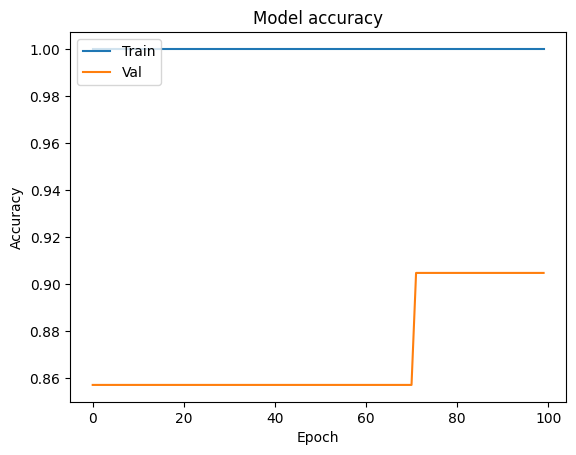

In [40]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

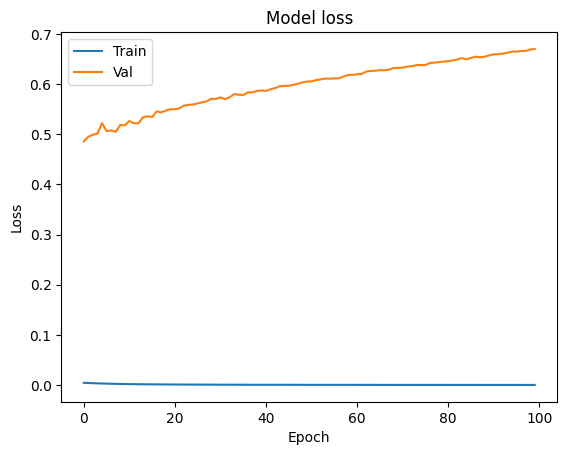

In [41]:
# Plot training and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()